# **Task**

Классифицировать заболевания по базе симптомов

Классы:

- Аппендицит
- Гепатит
- Дуоденит
- Панкреатит
- Колит
- Гастрит
- Эзофагит
- Энтерит
- Язва
- Холицестит

In [ ]:
from google.colab import files #модуль для загрузки файлов в colab
import numpy as np #библиотека для работы с массивами данных
import pandas as pd #библиотека для обработки и анализа данных
import matplotlib.pyplot as plt #библиотека для визуализации данных
import os
# "Магическая"команда python для запуска библиотеки в ноутбуке
%matplotlib inline

from tensorflow.keras import utils #для вызова метода to_categorical для преобразования категорий в вектора ohe
from tensorflow.keras.models import Sequential #последовательная модель нейросети кераса
# Загружаем стандартные слои нейросети(полносвязный, регуляризации, нормализации, векторного представления слов, выравнивания, активации)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
# Загружаем алгоритмы обучения/оптимизации
from tensorflow.keras.optimizers import Adam, RMSprop

from keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки

from google.colab import drive                        # Для работы с Google Drive
import time
from tensorflow.keras.callbacks import  Callback

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def readtext(filename):
  f = open(filename)
  text = f.read()
  text = text.replace('\n',' ')

  return text

file_names = os.listdir('/content/drive/MyDrive/Базы/Болезни')
file_names.remove('Язва.gdoc')
print(file_names)

train = []

for i in file_names:
  train.append(readtext('/content/drive/MyDrive/Базы/Болезни/' + i))


['Аппендицит.txt', 'Гепатит.txt', 'Дуоденит.txt', 'Панкреатит.txt', 'Колит.txt', 'Гастрит.txt', 'Эзофагит.txt', 'Энтерит.txt', 'Язва.txt', 'Холицестит.txt']


In [ ]:
train

['Резкая боль в животе Повышение температуры Напряженность мышц Тошнота  Острая боль в животе, в том числе и при надавливании Повышение температуры Тошнота Рвота  Тупая боль возле пупка или верхней части живота, которая становится острой, опускаясь в нижнюю правую часть живота. Обычно это первый симптом; Потеря аппетита; Тошнота и/или рвота вскоре после того, как началась боль в животе; Отек брюшной полости; Повышение температуры.  Тупя или острая боль в верхней или нижней части живота, спины или прямой кишки; Болезненное и/или затрудненное мочеиспускание; Рвота Сильные судороги Запор или диарея  Боль в животе, сначала в эпигастральной области или околопупочной области; нередко она имеет нелокализованный характер (боли «по всему животу») Отсутствие аппетита  Тошнота рвота 1-2 кратная  Подъём температуры до 37-38 жидкий стул частые мочеиспускания повышение числа сердечных сокращений повышение давления  Потеря аппетита тошнота Рвота Повышение температуры тела Запор или диарея  Боль в жив

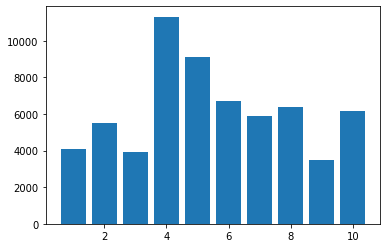

In [ ]:
word_count = [len(x) for x in train]
index = np.arange(1,11)
plt.bar(index, word_count)
plt.show()

# Preprocessing

In [ ]:
max_count_words = 2000
tokenizer = Tokenizer(num_words=max_count_words, filters='–—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\xa0–\ufeff', split= ' ',oov_token='unknown',)
tokenizer.fit_on_texts(train)

In [ ]:
items = list(tokenizer.word_index.items())
print(items[0:100])

[('unknown', 1), ('в', 2), ('и', 3), ('боль', 4), ('тошнота', 5), ('или', 6), ('рвота', 7), ('боли', 8), ('живота', 9), ('при', 10), ('животе', 11), ('после', 12), ('области', 13), ('отрыжка', 14), ('с', 15), ('слабость', 16), ('аппетита', 17), ('во', 18), ('тела', 19), ('изжога', 20), ('вздутие', 21), ('может', 22), ('снижение', 23), ('пищи', 24), ('повышение', 25), ('температуры', 26), ('рту', 27), ('еды', 28), ('диарея', 29), ('на', 30), ('иногда', 31), ('до', 32), ('к', 33), ('метеоризм', 34), ('температура', 35), ('подреберье', 36), ('верхней', 37), ('части', 38), ('не', 39), ('правом', 40), ('стул', 41), ('потеря', 42), ('чувство', 43), ('общая', 44), ('эпигастральной', 45), ('желудка', 46), ('урчание', 47), ('ощущение', 48), ('отсутствие', 49), ('ощущения', 50), ('понос', 51), ('нарушение', 52), ('позывы', 53), ('тяжести', 54), ('которая', 55), ('запор', 56), ('время', 57), ('кожи', 58), ('приема', 59), ('могут', 60), ('повышенная', 61), ('появление', 62), ('эпигастрии', 63), ('

In [ ]:
print("Интересующее слово имеет индекс: ", tokenizer.word_index[input("уточните слово: ")]) #протестируем словарь частотности

уточните слово: 1
Интересующее слово имеет индекс:  107


In [ ]:
train_ind = tokenizer.texts_to_sequences(train)
print(train_ind)

[[97, 4, 2, 11, 25, 26, 873, 213, 5, 98, 4, 2, 11, 2, 407, 556, 3, 10, 557, 25, 26, 5, 7, 153, 4, 874, 88, 6, 37, 38, 9, 55, 120, 255, 875, 2, 408, 256, 558, 9, 89, 257, 559, 409, 42, 17, 5, 3, 6, 7, 410, 12, 411, 90, 876, 4, 2, 11, 877, 258, 141, 25, 26, 878, 6, 98, 4, 2, 37, 6, 142, 38, 9, 412, 6, 560, 320, 321, 3, 6, 322, 561, 7, 259, 562, 56, 6, 29, 4, 2, 11, 563, 2, 45, 13, 6, 564, 13, 323, 182, 214, 879, 81, 8, 880, 881, 882, 49, 17, 5, 7, 107, 143, 883, 884, 26, 32, 260, 121, 144, 41, 122, 885, 25, 886, 324, 325, 25, 99, 42, 17, 5, 7, 25, 26, 19, 56, 6, 29, 4, 2, 11, 5, 7, 41, 3, 565, 70, 887, 566, 413, 414, 10, 567, 154, 35, 19, 183, 32, 260, 261, 888, 262, 568, 889, 415, 2, 416, 108, 82, 890, 326, 417, 32, 418, 891, 892, 2, 107, 569, 893, 39, 419, 3, 263, 10, 567, 154, 215, 216, 100, 155, 3, 894, 264, 895, 120, 570, 4, 2, 63, 6, 13, 88, 420, 5, 7, 896, 8, 2, 11, 6, 184, 88, 4, 83, 3, 327, 123, 571, 109, 7, 39, 83, 107, 143, 897, 21, 9, 74, 35, 32, 121, 572, 217, 4, 265, 9, 218

In [ ]:
for i in train_ind:
  print(max(i))

926
1028
1066
1377
1532
1607
1711
1846
1888
1992


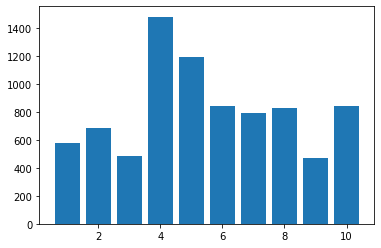

In [ ]:
word_count = [len(x) for x in train_ind]
index = np.arange(1,11)
plt.bar(index, word_count)
plt.show()

In [ ]:
train_ind[0]

In [ ]:
def get_set_ind(indexes, len_set, step):
  samples = []
  n_ind = len(indexes)
  st_ind = 0

  while (st_ind + len_set) <= n_ind:
    samples.append(indexes[st_ind:st_ind+len_set])
    st_ind += step

  return samples
  
def get_set_ind_in_one(indexes, len_set, step):
  sample1 = []
  num_ind = len(indexes)
  for i in indexes:                                                   # подсовываем список типа [[3 3434 44][343 353 4][4 545 777].....]
    sample1.append(get_set_ind(i, len_set, step))                     # получаем [[[3 3434][3434 44]][[343 353][353 4]]........]

  sample_x = []
  for i in sample1:
    for j in i:
      sample_x.append(j)                                              #разбиваем скобки и получаем [[3 3434][3434 44][343 353][353 4]....]

  sample_y = []
  for i in range(num_ind):                                            # перебираем классы 0 - 5
    xi = sample1[i]                                                   # спускаемся на уровень каскада примеров определенного писателя
    for j in xi:                                                      # каждый пример этого каскада
      sample_y.append(utils.to_categorical(i,num_ind))                # проходя через categorical добавляется в sample_y

  sample_x = np.array(sample_x)
  sample_y = np.array(sample_y)

  return sample_x,sample_y

In [ ]:
len_set = 50
step = 5
x_train, y_train = get_set_ind_in_one(train_ind, len_set, step) 

In [ ]:
x_train[0]

array([ 97,   4,   2,  11,  25,  26, 873, 213,   5,  98,   4,   2,  11,
         2, 407, 556,   3,  10, 557,  25,  26,   5,   7, 153,   4, 874,
        88,   6,  37,  38,   9,  55, 120, 255, 875,   2, 408, 256, 558,
         9,  89, 257, 559, 409,  42,  17,   5,   3,   6,   7])

In [ ]:
xTrain, xTest, yTrain, yTest  =  train_test_split(x_train,y_train,shuffle = True,test_size=0.2)

In [ ]:
type(xTrain)

numpy.ndarray

In [ ]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1236, 50)
(309, 50)
(1236, 10)
(309, 10)


In [ ]:
xTrain

array([[  25,   26,   19, ...,    9,  587,  333],
       [ 432,  941,  433, ...,  947,  598,  948],
       [1654,   19,    2, ...,  106,  244,    2],
       ...,
       [ 864,  440,   18, ...,   18,   27,   73],
       [  62, 1965,  693, ...,  868,  124,   43],
       [1941,   24,   61, ...,    3, 1944,  836]])

# Modelling

In [ ]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
def Creat_Mod():
  modelEL = Sequential() # создаём последовательную модель нейросети

  # преобразовываем каждое слово в многомерный вектор c указанием размерности вектора и длины входных данных
  modelEL.add(Embedding(max_count_words, 30, input_length=len_set))
  modelEL.add(SpatialDropout1D(0.2)) # добавляем слой регуляризации, "выключая" 1D карты объектов из эмбединг векторов, во избежание переобучения

  modelEL.add(BatchNormalization()) # добавляем слой нормализации данных

  modelEL.add(Conv1D(20, 5, activation="relu", padding='same'))
  modelEL.add(MaxPooling1D(2))
  modelEL.add(Dropout(0.3))

  modelEL.add(LSTM(16, return_sequences=1))

  modelEL.add(Flatten())

  modelEL.add(Dense(16,activation='relu'))
  modelEL.add(Dropout(0.2))

  modelEL.add(Dense(10, activation='softmax')) # добавляем полносвязный слой на 6 нейронов, с функцией активации softmax на выходном слое

  # Компиляция, составление модели с выбором алгоритма оптимизации, функции потерь и метрики точности
  modelEL.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return modelEL

In [ ]:
count_acc = []
mean_t_epoch = []

## Embedding + LSTM сеть

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 50, 30)            60000     
_________________________________________________________________
spatial_dropout1d_19 (Spatia (None, 50, 30)            0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 50, 30)            120       
_________________________________________________________________
lstm_21 (LSTM)               (None, 32)                8064      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 68,514
Trainable params: 68,454
Non-trainable params: 60
________________________________________________

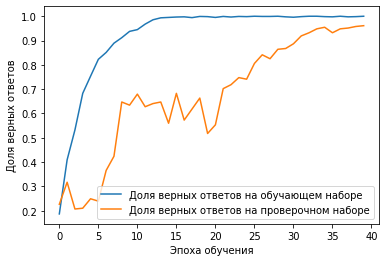

In [ ]:
modelEL1 = Creat_Mod()

modelEL1.summary()

time_callback1 = TimeHistory()

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL1.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=128,
                    validation_data=(xTest, yTest), callbacks=[time_callback1])


count_acc.append(max(history.history['val_accuracy']))
mean_t_epoch.append(np.array(time_callback1.times).mean())

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Embedding + Conv1D сеть

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 30)            60000     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 30)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 30)            120       
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 10)            1510      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 10)            0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 10)            0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0

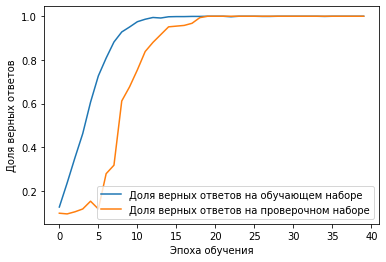

In [ ]:
modelEL2 = Creat_Mod()

modelEL2.summary()

time_callback2 = TimeHistory()

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL2.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=128,
                    validation_data=(xTest, yTest), callbacks=[time_callback2])


count_acc.append(max(history.history['val_accuracy']))
mean_t_epoch.append(np.array(time_callback2.times).mean())

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Embedding + сложная сеть из Dense, LSTM и Conv1D

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 30)            60000     
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 30)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 30)            120       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 20)            3020      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 20)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25, 20)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 25, 16)           

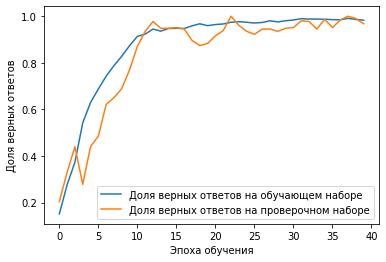

In [ ]:
modelEL3 = Creat_Mod()

modelEL3.summary()

time_callback3 = TimeHistory()

# Обучаем сеть с указанием тренировочной выборки, количества эпох, размера минибатча для подачи сети, и тестовой выборки
history = modelEL3.fit(xTrain, 
                    yTrain, 
                    epochs=40,
                    batch_size=128,
                    validation_data=(xTest, yTest), callbacks=[time_callback3])


count_acc.append(max(history.history['val_accuracy']))
mean_t_epoch.append(np.array(time_callback3.times).mean())

# Строим график для отображения динамики обучения и точности предсказания сети
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Conclusions

In [ ]:
count_acc_r=[round(v,3) for v in count_acc]
mean_t_epoch_r=[round(v,3) for v in mean_t_epoch]

In [ ]:
data = pd.DataFrame({'Испытание': ['Embedding + LSTM сеть',
                                   'Embedding + Conv1D сеть',
                                   'Embedding + сложная сеть из Dense, LSTM и Conv1D'], 'MAX Точность сети': count_acc_r,
                                    'Средняя Длительность эпохи [сек]':mean_t_epoch_r})
data

,Испытание,MAX Точность сети,Средняя Длительность эпохи [сек]
0,Embedding + LSTM сеть,0.961,0.175
1,Embedding + Conv1D сеть,1.000,0.273
2,"Embedding + сложная сеть из Dense, LSTM и Conv1D",1.000,0.164
